# Project 3_Clustering_and_NLP_Post_Review2

## 1.1 Problem definition

In this project, we'll leverage Sklearn's TFIDF vectorizer and focus on the unsupervised situation when the classes are not known and they need to be discovered via clustering(KMeans). After which, we predict the cluster labels for new documents, plot visualizations using MDS, PCA, and TSNE, and finally, show the top keywords in each cluster.

## 2.1 Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

## 2.2 Data Loading

In [2]:
data = pd.read_json('./Data/combined.json', lines=True)

## 3.1 Exploratory Data Analysis and TrainTestSplit

In [3]:
data.head()

,id,title,contents,date,topics,components
0,None,Convicted Bomb Plotter Sentenced to 30 Years,"PORTLAND, Oregon. – Mohamed Osman Mohamud, 23,...",2014-10-01T00:00:00-04:00,[],[National Security Division (NSD)]
1,12-919,$1 Million in Restitution Payments Announced t...,WASHINGTON – North Carolina’s Waccamaw River...,2012-07-25T00:00:00-04:00,[],[Environment and Natural Resources Division]
2,11-1002,$1 Million Settlement Reached for Natural Reso...,BOSTON– A $1-million settlement has been...,2011-08-03T00:00:00-04:00,[],[Environment and Natural Resources Division]
3,10-015,10 Las Vegas Men Indicted \r\nfor Falsifying V...,WASHINGTON—A federal grand jury in Las Vegas...,2010-01-08T00:00:00-05:00,[],[Environment and Natural Resources Division]
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division]


In [4]:
train, test = train_test_split(data, test_size=0.2)

In [5]:
test.head()

,id,title,contents,date,topics,components
2543,11-1092,Detroit Occupational Therapist Pleads Guilty t...,WASHINGTON – A Detroit-area occupational the...,2011-08-25T00:00:00-04:00,[],[Criminal Division]
9622,14-1141,Operators of Houston Area Diagnostic Centers A...,Two groups of Houston-based diagnostic centers...,2014-10-17T00:00:00-04:00,[],[Civil Division]
7719,16-448,Justice Department Sues Two Hospital Systems f...,The Department of Justice today sued Charlesto...,2016-04-14T00:00:00-04:00,[Antitrust],[Antitrust Division]
11670,10-1180,"Toledo, Ohio, Agrees to Make Major Improvement...","WASHINGTON – The city of Toledo, Ohio, has a...",2010-10-21T00:00:00-04:00,[],[Environment and Natural Resources Division]
10655,14-1079,Shell Company Operator Pleads Guilty in Multi-...,A Florida managing member of a shell company p...,2014-10-02T00:00:00-04:00,[],[Criminal Division]


In [6]:
train.shape

(10469, 6)

In [7]:
test_15 = test.head(15)

In [8]:
test_15.shape

(15, 6)

In [9]:
test.shape

(2618, 6)

In [10]:
data.shape

(13087, 6)

## 4.1 Machine Learning

In [11]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(train.contents)
train_text = tfidf.transform(train.contents)

In [12]:
train_text.shape

(10469, 8000)

In [13]:
df = pd.DataFrame(train_text.toarray(), columns=tfidf.get_feature_names())
df.head()

,00,000,0301,0383,05,09,10,100,1040,107,...,zhou,ziff,zimmerman,zink,zone,zoning,zuckerman,zugrav,zurich,zylon
0,0.0,0.045472,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.071834,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.011520,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.054009,0.0,0.0,0.0,0.0,0.034683,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df.shape

(10469, 8000)

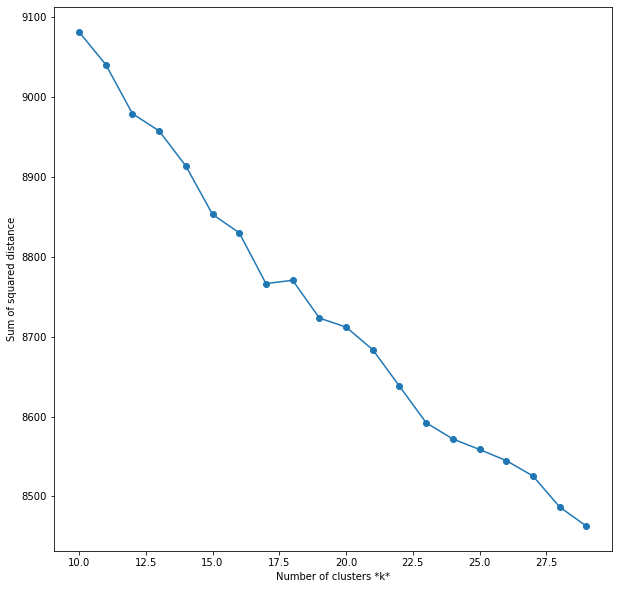

In [15]:
sse = []
list_k = list(range(10, 30))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(train_text)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(10, 10))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [16]:
kmeans = KMeans(n_clusters=25).fit(train_text)

In [17]:
test.contents.head()

2543       WASHINGTON – A Detroit-area occupational the...
9622     Two groups of Houston-based diagnostic centers...
7719     The Department of Justice today sued Charlesto...
11670      WASHINGTON – The city of Toledo, Ohio, has a...
10655    A Florida managing member of a shell company p...
Name: contents, dtype: object

In [18]:
test_text=tfidf.transform(test.contents)

In [19]:
kMeansClusters= kmeans.predict(test_text)

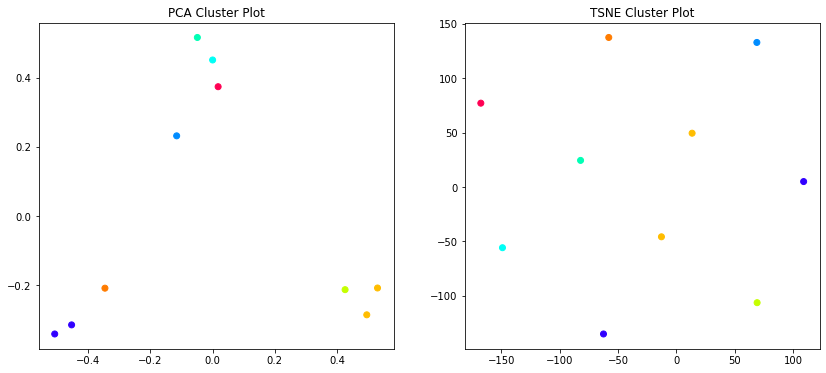

In [20]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=10, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=5).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=10, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(test_text, kMeansClusters)

In [24]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(test_text)

In [25]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [26]:
cluster_keywords=[]
def get_top_keywords(data, kMeansClusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(kMeansClusters).mean()
  
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        temp = ','.join([labels[t] for t in np.argsort(r)[-n_terms:]])
        cluster_keywords.append(temp)
        print(temp)
            
get_top_keywords(test_text, kMeansClusters, tfidf.get_feature_names(), 10)


Cluster 0
consumer,products,dietary,adulterated,manufacturing,complaint,drugs,drug,food,fda

Cluster 1
fraud,bribery,contracts,company,fcpa,defense,criminal,government,contract,army

Cluster 2
beneficiaries,billed,strike,oig,services,care,hhs,fraud,health,medicare

Cluster 3
identities,aggravated,refund,irs,refunds,stolen,returns,theft,identity,tax

Cluster 4
borrowers,securities,loans,force,bank,lending,mortgage,task,fraud,financial

Cluster 5
revenue,attorney,bank,accounts,false,taxes,returns,income,irs,tax

Cluster 6
settlement,lawsuit,civil,rights,act,disabilities,hud,discrimination,fair,housing

Cluster 7
monitor,bailout,act,ballots,observers,elections,voters,rights,election,voting

Cluster 8
site,river,sewer,environment,natural,settlement,clean,environmental,epa,water

Cluster 9
water,environmental,waste,oily,pollution,ship,vessel,oil,guard,coast

Cluster 10
settlement,price,fixing,division,industry,department,prices,competition,proposed,antitrust

Cluster 11
national,security,f

In [27]:
cluster_keywords

['consumer,products,dietary,adulterated,manufacturing,complaint,drugs,drug,food,fda',
 'fraud,bribery,contracts,company,fcpa,defense,criminal,government,contract,army',
 'beneficiaries,billed,strike,oig,services,care,hhs,fraud,health,medicare',
 'identities,aggravated,refund,irs,refunds,stolen,returns,theft,identity,tax',
 'borrowers,securities,loans,force,bank,lending,mortgage,task,fraud,financial',
 'revenue,attorney,bank,accounts,false,taxes,returns,income,irs,tax',
 'settlement,lawsuit,civil,rights,act,disabilities,hud,discrimination,fair,housing',
 'monitor,bailout,act,ballots,observers,elections,voters,rights,election,voting',
 'site,river,sewer,environment,natural,settlement,clean,environmental,epa,water',
 'water,environmental,waste,oily,pollution,ship,vessel,oil,guard,coast',
 'settlement,price,fixing,division,industry,department,prices,competition,proposed,antitrust',
 'national,security,fbi,terrorism,material,support,al,isis,isil,terrorist',
 'border,enforcement,drugs,opioid

In [28]:
cluster_keywords_dict={}
for index, value in enumerate(cluster_keywords):
    cluster_keywords_dict[index] = value

In [29]:
cluster_keywords_dict

{0: 'consumer,products,dietary,adulterated,manufacturing,complaint,drugs,drug,food,fda',
 1: 'fraud,bribery,contracts,company,fcpa,defense,criminal,government,contract,army',
 2: 'beneficiaries,billed,strike,oig,services,care,hhs,fraud,health,medicare',
 3: 'identities,aggravated,refund,irs,refunds,stolen,returns,theft,identity,tax',
 4: 'borrowers,securities,loans,force,bank,lending,mortgage,task,fraud,financial',
 5: 'revenue,attorney,bank,accounts,false,taxes,returns,income,irs,tax',
 6: 'settlement,lawsuit,civil,rights,act,disabilities,hud,discrimination,fair,housing',
 7: 'monitor,bailout,act,ballots,observers,elections,voters,rights,election,voting',
 8: 'site,river,sewer,environment,natural,settlement,clean,environmental,epa,water',
 9: 'water,environmental,waste,oily,pollution,ship,vessel,oil,guard,coast',
 10: 'settlement,price,fixing,division,industry,department,prices,competition,proposed,antitrust',
 11: 'national,security,fbi,terrorism,material,support,al,isis,isil,terrori

In [30]:
import random 
     
def colors(n): 
      ret = {} 
      r = int(random.random() * 256) 
      g = int(random.random() * 256) 
      b = int(random.random() * 256) 
      step = 256 / n 
      for i in range(n): 
        r += step 
        g += step 
        b += step 
        r = int(r) % 256 
        g = int(g) % 256 
        b = int(b) % 256 
        ret[i]=(r,g,b)  
      return ret 
p={}
p=colors(25)
print(p)
cluster_colors=p
cluster_hexcolors={}

{0: (47, 18, 203), 1: (57, 28, 213), 2: (67, 38, 223), 3: (77, 48, 233), 4: (87, 58, 243), 5: (97, 68, 253), 6: (107, 78, 7), 7: (117, 88, 17), 8: (127, 98, 27), 9: (137, 108, 37), 10: (147, 118, 47), 11: (157, 128, 57), 12: (167, 138, 67), 13: (177, 148, 77), 14: (187, 158, 87), 15: (197, 168, 97), 16: (207, 178, 107), 17: (217, 188, 117), 18: (227, 198, 127), 19: (237, 208, 137), 20: (247, 218, 147), 21: (1, 228, 157), 22: (11, 238, 167), 23: (21, 248, 177), 24: (31, 2, 187)}


In [31]:
def rgb_to_hex(rgb):
    return '#'+'%02x%02x%02x' % rgb
rgb_to_hex((255, 255, 195))

'#ffffc3'

In [32]:
for i in cluster_colors:
    var=cluster_colors[i]
    cluster_hexcolors[i]=rgb_to_hex(var)

In [33]:
cluster_hexcolors

{0: '#2f12cb',
 1: '#391cd5',
 2: '#4326df',
 3: '#4d30e9',
 4: '#573af3',
 5: '#6144fd',
 6: '#6b4e07',
 7: '#755811',
 8: '#7f621b',
 9: '#896c25',
 10: '#93762f',
 11: '#9d8039',
 12: '#a78a43',
 13: '#b1944d',
 14: '#bb9e57',
 15: '#c5a861',
 16: '#cfb26b',
 17: '#d9bc75',
 18: '#e3c67f',
 19: '#edd089',
 20: '#f7da93',
 21: '#01e49d',
 22: '#0beea7',
 23: '#15f8b1',
 24: '#1f02bb'}

In [34]:
#set up colors per clusters using a dict
#DarkGreen Orange Violet purple green lightBlue black yellow pink gray
cluster_colors = cluster_hexcolors

#set up cluster names using a dict
cluster_names = cluster_keywords_dict

In [35]:
cluster_colors

{0: '#2f12cb',
 1: '#391cd5',
 2: '#4326df',
 3: '#4d30e9',
 4: '#573af3',
 5: '#6144fd',
 6: '#6b4e07',
 7: '#755811',
 8: '#7f621b',
 9: '#896c25',
 10: '#93762f',
 11: '#9d8039',
 12: '#a78a43',
 13: '#b1944d',
 14: '#bb9e57',
 15: '#c5a861',
 16: '#cfb26b',
 17: '#d9bc75',
 18: '#e3c67f',
 19: '#edd089',
 20: '#f7da93',
 21: '#01e49d',
 22: '#0beea7',
 23: '#15f8b1',
 24: '#1f02bb'}

In [36]:
cluster_keywords_dict

{0: 'consumer,products,dietary,adulterated,manufacturing,complaint,drugs,drug,food,fda',
 1: 'fraud,bribery,contracts,company,fcpa,defense,criminal,government,contract,army',
 2: 'beneficiaries,billed,strike,oig,services,care,hhs,fraud,health,medicare',
 3: 'identities,aggravated,refund,irs,refunds,stolen,returns,theft,identity,tax',
 4: 'borrowers,securities,loans,force,bank,lending,mortgage,task,fraud,financial',
 5: 'revenue,attorney,bank,accounts,false,taxes,returns,income,irs,tax',
 6: 'settlement,lawsuit,civil,rights,act,disabilities,hud,discrimination,fair,housing',
 7: 'monitor,bailout,act,ballots,observers,elections,voters,rights,election,voting',
 8: 'site,river,sewer,environment,natural,settlement,clean,environmental,epa,water',
 9: 'water,environmental,waste,oily,pollution,ship,vessel,oil,guard,coast',
 10: 'settlement,price,fixing,division,industry,department,prices,competition,proposed,antitrust',
 11: 'national,security,fbi,terrorism,material,support,al,isis,isil,terrori

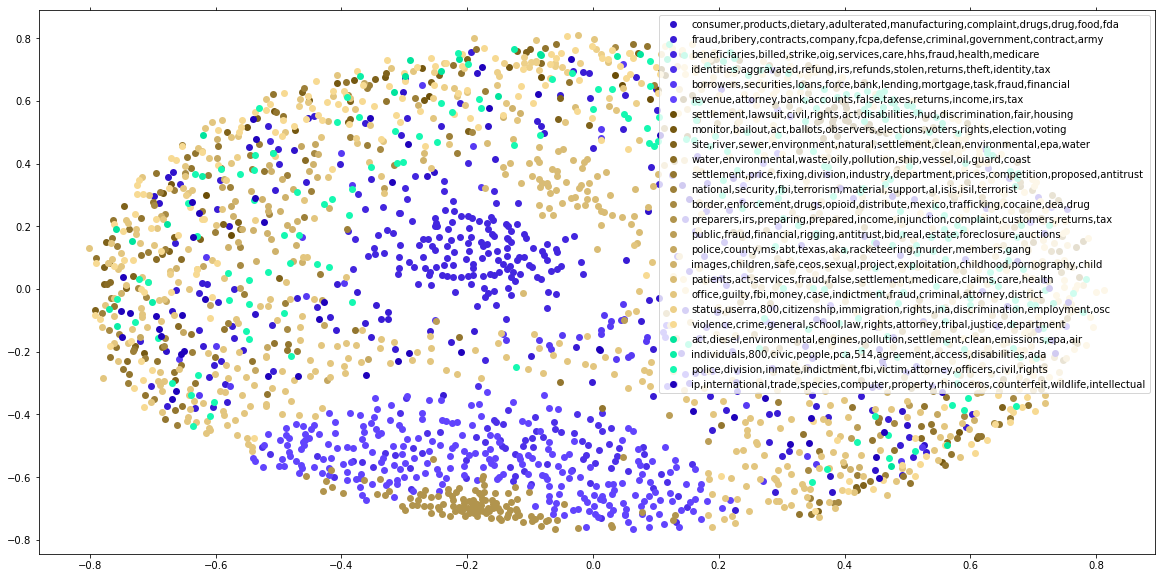

In [37]:
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=kMeansClusters)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(20, 10)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=7, 
            label=cluster_names[name],
            color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

    
    
plt.show() #show the plot

## Post review changes

## 5.1 Validation

In [40]:
test_10=test_15.head(10)

In [41]:
pd.options.display.max_colwidth = 10000

In [84]:
test_10.iloc[9:10, 1:2]

,title
9437,Northern Virginia Business Owner Pleads Guilty to Failing to Pay Employment Taxes


## Cluster labels given by user

In [79]:
actual_labels=[ 2, 17, 17, 8 , 18 , 1, 6, 17, 20 , 5]

## Expected cluster labels from model

In [43]:
test10_text=tfidf.transform(test_10.contents)
kMeansClusters10= kmeans.predict(test10_text)

In [44]:
kMeansClusters10.shape

(10,)

In [47]:
kMeansClusters10

array([ 2, 17, 10,  8,  2,  1, 22,  2, 20,  5], dtype=int32)

In [80]:
predicted_labels= list(kMeansClusters10)

In [85]:
actual_labels

[2, 17, 17, 8, 18, 1, 6, 17, 20, 5]

In [82]:
predicted_labels

[2, 17, 10, 8, 2, 1, 22, 2, 20, 5]

## Results

## 5.1 Accuracy score as a metric

Accuracy here is defined as the proportion of correct cluster label predictions from total number of label predictions

In [83]:
count=0
for i in range(10):
    if predicted_labels[i] == actual_labels[i]:
        count+=1
accuracy= count/10
print("Accuracy of the model is",accuracy)

Accuracy of the model is 0.6


## 5.2 Silhouette Coefficient as a metric

In [38]:
from sklearn import metrics

When the number of clusters is set to 25(choosen based on Elbow Method)

In [39]:
labels = kmeans.labels_
metrics.silhouette_score(train_text, labels, metric='euclidean')

0.042764024168297124